<a href="https://colab.research.google.com/github/mpartain1/CodingDojoAssignments/blob/main/SimpleNeuralNetworksExecise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
import sklearn.metrics as metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
df = pd.read_csv('/content/heart - heart.csv')

# Data Exploration and Cleaning

In [3]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

### Below, we look at histograms for each of the numerical values to determine if there are any unrealistic outliers to either remove or impute with the category's mean.

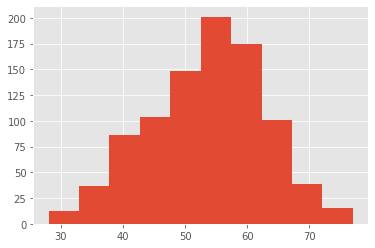

In [4]:
plt.style.use('ggplot')
df['Age'].hist()

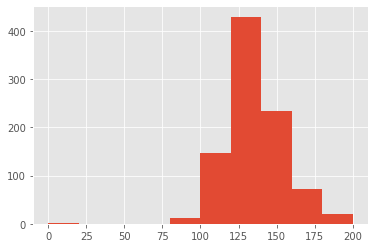

In [5]:
plt.style.use('ggplot')
df['RestingBP'].hist()

It appears there is at least one value around zero that should not be there, we will further examine this point/s and impute the mean RestingBP here since the histogram roughly follows a bell curve.

In [19]:
df['RestingBP'].min()
df.loc[df['RestingBP']==0, 'RestingBP'] = df['RestingBP'].mean()

In [18]:
df['RestingBP'].min()

80.0

The zero value for RestingBP has been taken care of.

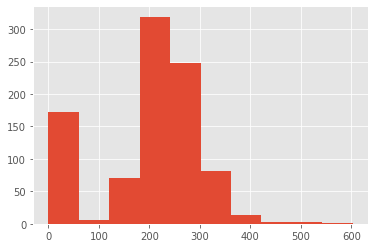

In [6]:
plt.style.use('ggplot')
df['Cholesterol'].hist()

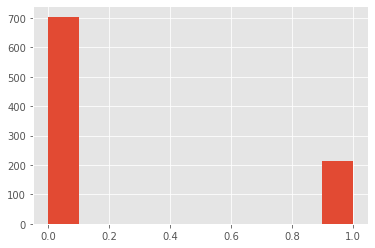

In [7]:
plt.style.use('ggplot')
df['FastingBS'].hist()

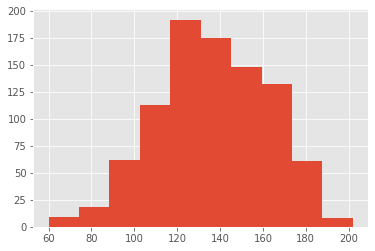

In [8]:
plt.style.use('ggplot')
df['MaxHR'].hist()

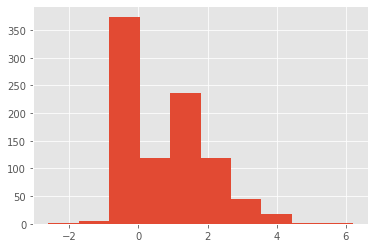

In [10]:
plt.style.use('ggplot')
df['Oldpeak'].hist()

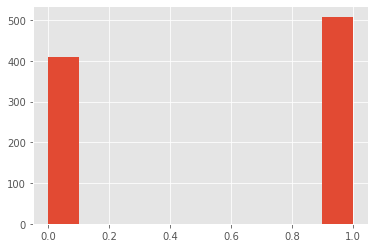

In [11]:
plt.style.use('ggplot')
df['HeartDisease'].hist()

### From the above graphs, we can see that there aren't any more column values too far off the main groups, so row deletion or mean imputation are not necessary for the other columns besides RestingBP. There are also no meaningless columns to drop. We will now check for and remove duplicates.

In [20]:
df.drop_duplicates(inplace=True)

We will now check for inconsistent categorical column values.

In [21]:
df['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [22]:
df['Sex'].value_counts()

M    725
F    193
Name: Sex, dtype: int64

In [23]:
df['RestingECG'].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [26]:
df['ExerciseAngina'].value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [27]:
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

### Categorical column values are consistent.

In [37]:
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include = 'object')
num_tuple = (StandardScaler(), num_selector)
cat_tuple = (OneHotEncoder(handle_unknown = 'ignore'), cat_selector)
preprocessor = make_column_transformer(num_tuple, cat_tuple, remainder = 'passthrough')
y = df['HeartDisease']
X = df.drop(columns = ['HeartDisease'])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
preprocessor.fit(X_train)
X_train_proc = preprocessor.transform(X_train)
X_test_proc = preprocessor.transform(X_test)

# Model 1:

Epoch 1/10
22/22 [==============================] - 1s 9ms/step - loss: 0.7206 - val_loss: 0.6890
Epoch 2/10
22/22 [==============================] - 0s 6ms/step - loss: 0.6488 - val_loss: 0.6254
Epoch 3/10
22/22 [==============================] - 0s 3ms/step - loss: 0.5902 - val_loss: 0.5731
Epoch 4/10
22/22 [==============================] - 0s 3ms/step - loss: 0.5421 - val_loss: 0.5270
Epoch 5/10
22/22 [==============================] - 0s 3ms/step - loss: 0.4991 - val_loss: 0.4914
Epoch 6/10
22/22 [==============================] - 0s 4ms/step - loss: 0.4639 - val_loss: 0.4595
Epoch 7/10
22/22 [==============================] - 0s 3ms/step - loss: 0.4346 - val_loss: 0.4353
Epoch 8/10
22/22 [==============================] - 0s 4ms/step - loss: 0.4110 - val_loss: 0.4171
Epoch 9/10
22/22 [==============================] - 0s 4ms/step - loss: 0.3938 - val_loss: 0.4030
Epoch 10/10
22/22 [==============================] - 0s 3ms/step - loss: 0.3806 - val_loss: 0.3909
final RMSE: 0.34681

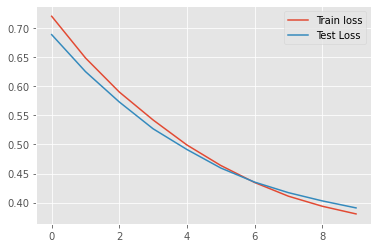

In [40]:
#Model Definition
input_shape = X_train_proc.shape[1]
model = Sequential()
model.add(Dense(12, 
                input_dim = input_shape, 
                activation = 'relu')) 
model.add(Dense(1, activation = 'sigmoid'))

#Compilation
model.compile(loss = 'bce', optimizer = 'adam')

#Training history
history = model.fit(X_train_proc, y_train,
                    validation_data = (X_test_proc, y_test), 
                    epochs=10)

#Visualization
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

#Metrics
y_pred = model.predict(X_test_proc)
print(f'final RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'final MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'final R2: {r2_score(y_test, y_pred)}')

# Model 2:

Epoch 1/10
22/22 [==============================] - 1s 16ms/step - loss: 0.7070 - val_loss: 0.6697
Epoch 2/10
22/22 [==============================] - 0s 8ms/step - loss: 0.6438 - val_loss: 0.6235
Epoch 3/10
22/22 [==============================] - 0s 8ms/step - loss: 0.5902 - val_loss: 0.5789
Epoch 4/10
22/22 [==============================] - 0s 6ms/step - loss: 0.5355 - val_loss: 0.5294
Epoch 5/10
22/22 [==============================] - 0s 5ms/step - loss: 0.4877 - val_loss: 0.4876
Epoch 6/10
22/22 [==============================] - 0s 5ms/step - loss: 0.4518 - val_loss: 0.4558
Epoch 7/10
22/22 [==============================] - 0s 5ms/step - loss: 0.4268 - val_loss: 0.4360
Epoch 8/10
22/22 [==============================] - 0s 6ms/step - loss: 0.4103 - val_loss: 0.4200
Epoch 9/10
22/22 [==============================] - 0s 5ms/step - loss: 0.3976 - val_loss: 0.4098
Epoch 10/10
22/22 [==============================] - 0s 6ms/step - loss: 0.3884 - val_loss: 0.3967
final RMSE: 0.3545

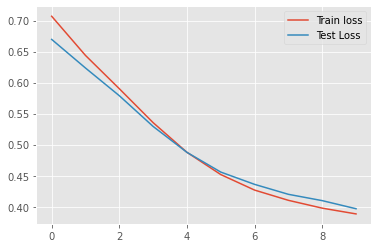

In [41]:
#Model Definition
input_shape = X_train_proc.shape[1]
model = Sequential()
model.add(Dense(12, 
                input_dim = input_shape, 
                activation = 'relu')) 
model.add(Dense(6, 
                activation = 'relu')) 
model.add(Dense(1, activation = 'sigmoid'))

#Compilation
model.compile(loss = 'bce', optimizer = 'adam')

#Training history
history = model.fit(X_train_proc, y_train,
                    validation_data = (X_test_proc, y_test), 
                    epochs=10)

#Visualization
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

#Metrics
y_pred = model.predict(X_test_proc)
print(f'final RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'final MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'final R2: {r2_score(y_test, y_pred)}')

# Model 3

Epoch 1/10
22/22 [==============================] - 1s 20ms/step - loss: 0.6401 - val_loss: 0.6061
Epoch 2/10
22/22 [==============================] - 0s 6ms/step - loss: 0.5870 - val_loss: 0.5608
Epoch 3/10
22/22 [==============================] - 0s 6ms/step - loss: 0.5385 - val_loss: 0.5185
Epoch 4/10
22/22 [==============================] - 0s 6ms/step - loss: 0.4946 - val_loss: 0.4819
Epoch 5/10
22/22 [==============================] - 0s 6ms/step - loss: 0.4578 - val_loss: 0.4483
Epoch 6/10
22/22 [==============================] - 0s 7ms/step - loss: 0.4285 - val_loss: 0.4251
Epoch 7/10
22/22 [==============================] - 0s 9ms/step - loss: 0.4065 - val_loss: 0.3999
Epoch 8/10
22/22 [==============================] - 0s 7ms/step - loss: 0.3876 - val_loss: 0.3846
Epoch 9/10
22/22 [==============================] - 0s 7ms/step - loss: 0.3735 - val_loss: 0.3715
Epoch 10/10
22/22 [==============================] - 0s 8ms/step - loss: 0.3621 - val_loss: 0.3630
final RMSE: 0.3354

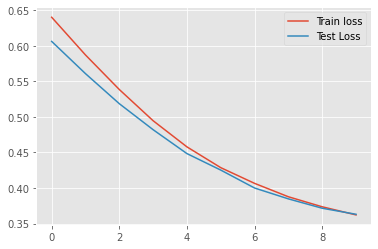

In [42]:
#Model Definition
input_shape = X_train_proc.shape[1]
model = Sequential()
model.add(Dense(12, 
                input_dim = input_shape, 
                activation = 'relu')) 
model.add(Dense(10, 
                activation = 'relu')) 
model.add(Dense(1, activation = 'sigmoid'))

#Compilation
model.compile(loss = 'bce', optimizer = 'adam')

#Training history
history = model.fit(X_train_proc, y_train,
                    validation_data = (X_test_proc, y_test), 
                    epochs=10)

#Visualization
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

#Metrics
y_pred = model.predict(X_test_proc)
print(f'final RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'final MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'final R2: {r2_score(y_test, y_pred)}')

As we can see Model 3 has the best regression metrics including the highest R^2 and lowest RMSE and MAE.